# TOC



# Import Neograph package

In [16]:
%load_ext autoreload
%autoreload 2
import neograph as ng

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Create a NeoGraph and Connect to DBMS

In [17]:
uri      = "bolt://localhost:7687" # in Neo4j Desktop
                              # custom URL for Sandbox or Aura
user     = "neo4j"            # your user name 
                              # default is always "neo4j" 
                              # unless you have changed it. 
password = 'usaa&ibm'   #your neo4j password

G = ng.NeoGraph(uri = uri, user = user, password = password)

# TESTING

## Contraints on DBMS (WORKING)

In [18]:
G.create_constraint(label = 'Person', prop = 'name', on='node', constraint_type = 'unique')
G.get_constraints()

Desired constraint on nodes for Person{name} already exists.

Get constraint query result:
[{'id': 4, 'name': 'Person_node_name_unique', 'type': 'UNIQUENESS', 'entityType': 'NODE', 'labelsOrTypes': ['Person'], 'properties': ['name'], 'ownedIndexId': 3}]


## Storage in DBMS (WORKING)

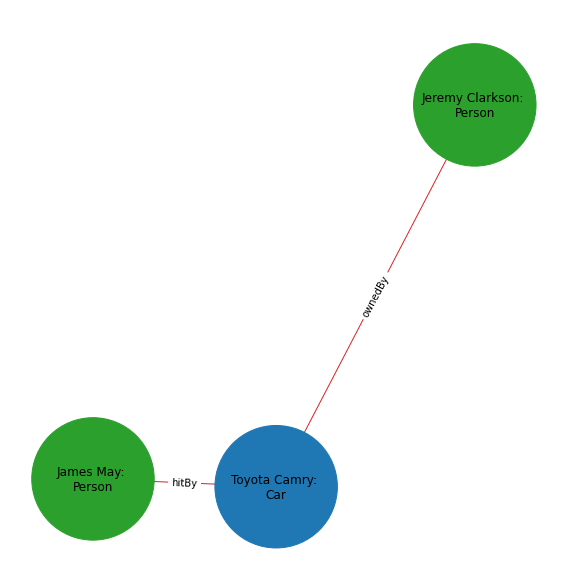

Storing the following node...
name: James May
label: Person
other props:  color:"green", favorite_food:"pizza", fav_ice_cream:"mint chip"


Add node query result:
[{'n': {'favorite_food': 'pizza', 'color': 'green', 'fav_ice_cream': 'mint chip', 'created': 1665101110729, 'name': 'James May'}, 'n.created': 1665101110729}]
Storing the following node...
name: Jeremy Clarkson
label: Person
other props:  color:"green", favorite_food:"Richard Hammond"


Add node query result:
[{'n': {'favorite_food': 'Richard Hammond', 'color': 'green', 'created': 1665101110765, 'name': 'Jeremy Clarkson'}, 'n.created': 1665101110765}]
Storing the following node...
name: Toyota Camry
label: Car
other props:  color:"blue", condition:"Like new"


Add node query result:
[{'n': {'condition': 'Like new', 'color': 'blue', 'created': 1665101110790, 'name': 'Toyota Camry'}, 'n.created': 1665101110790}]

Add relationship query result:
[{'e': ({}, 'hitBy', {})}]

Add relationship query result:
[{'e': ({}, 'ownedBy', {})

In [19]:
G.add_node('James May', data = {'color': 'green', 'label': 'Person', 'favorite_food':'pizza', 'fav_ice_cream': 'mint chip'})
G.add_node('Jeremy Clarkson', data = {'color' : 'green', 'label': 'Person', 'favorite_food':'Richard Hammond'})
G.add_node('Toyota Camry', data = {'color': 'blue', 'label': 'Car', 'condition':'Like new'})
G.add_edge('James May', 'Toyota Camry', label = 'hitBy')
G.add_edge('Toyota Camry', 'Jeremy Clarkson', label = 'ownedBy', purchase_date = '11/01/2020', purchase_price = '$18000')

ng.draw_labeled_net(G)

G.store_in_neo(verbose = True)

In [20]:
for edge in G.edges:
    print(G.edges[edge])
for node in G.nodes:
    print(G.nodes[node])

{'label': 'hitBy'}
{'label': 'ownedBy', 'purchase_date': '11/01/2020', 'purchase_price': '$18000'}
{'data': {'color': 'green', 'label': 'Person', 'favorite_food': 'pizza', 'fav_ice_cream': 'mint chip'}}
{'data': {'color': 'green', 'label': 'Person', 'favorite_food': 'Richard Hammond'}}
{'data': {'color': 'blue', 'label': 'Car', 'condition': 'Like new'}}


## Loading (NOT FINISHED, need to extract into networkx graph)

In [21]:
G.load_from_neo()

[{'n': {'favorite_food': 'pizza', 'color': 'green', 'fav_ice_cream': 'mint chip', 'created': 1665101110729, 'name': 'James May'}}, {'n': {'favorite_food': 'Richard Hammond', 'color': 'green', 'created': 1665101110765, 'name': 'Jeremy Clarkson'}}, {'n': {'condition': 'Like new', 'color': 'blue', 'created': 1665101110790, 'name': 'Toyota Camry'}}, {'n': {'condition': 'Like new', 'color': 'blue', 'created': 1665107304535, 'name': 'Honda Accord'}}, {'n': {'color': 'red', 'subtype': 'Claimant', 'created': 1665109260592, 'confidence': '0.999964', 'name': 'My', 'count': '6'}}, {'n': {'color': 'red', 'subtype': 'IncidentLocation', 'created': 1665109260708, 'confidence': '0.997111', 'name': 'parking lot', 'count': '1'}}, {'n': {'color': 'red', 'subtype': 'Number', 'created': 1665109260765, 'confidence': '0.989154', 'name': '#GYH98817', 'count': '1'}}, {'n': {'color': 'red', 'subtype': 'SUV', 'created': 1665109260823, 'confidence': '0.939176', 'name': 'Nationwide #RUH612912', 'count': '4'}}, {'n

[{'n': {'favorite_food': 'pizza',
   'color': 'green',
   'fav_ice_cream': 'mint chip',
   'created': 1665101110729,
   'name': 'James May'}},
 {'n': {'favorite_food': 'Richard Hammond',
   'color': 'green',
   'created': 1665101110765,
   'name': 'Jeremy Clarkson'}},
 {'n': {'condition': 'Like new',
   'color': 'blue',
   'created': 1665101110790,
   'name': 'Toyota Camry'}},
 {'n': {'condition': 'Like new',
   'color': 'blue',
   'created': 1665107304535,
   'name': 'Honda Accord'}},
 {'n': {'color': 'red',
   'subtype': 'Claimant',
   'created': 1665109260592,
   'confidence': '0.999964',
   'name': 'My',
   'count': '6'}},
 {'n': {'color': 'red',
   'subtype': 'IncidentLocation',
   'created': 1665109260708,
   'confidence': '0.997111',
   'name': 'parking lot',
   'count': '1'}},
 {'n': {'color': 'red',
   'subtype': 'Number',
   'created': 1665109260765,
   'confidence': '0.989154',
   'name': '#GYH98817',
   'count': '1'}},
 {'n': {'color': 'red',
   'subtype': 'SUV',
   'create

## Reading (WORKING)

In [22]:
G.read_from_neo()

[{'n': {'favorite_food': 'pizza', 'color': 'green', 'fav_ice_cream': 'mint chip', 'created': 1665101110729, 'name': 'James May'}}, {'n': {'favorite_food': 'Richard Hammond', 'color': 'green', 'created': 1665101110765, 'name': 'Jeremy Clarkson'}}, {'n': {'condition': 'Like new', 'color': 'blue', 'created': 1665101110790, 'name': 'Toyota Camry'}}, {'n': {'condition': 'Like new', 'color': 'blue', 'created': 1665107304535, 'name': 'Honda Accord'}}, {'n': {'color': 'red', 'subtype': 'Claimant', 'created': 1665109260592, 'confidence': '0.999964', 'name': 'My', 'count': '6'}}, {'n': {'color': 'red', 'subtype': 'IncidentLocation', 'created': 1665109260708, 'confidence': '0.997111', 'name': 'parking lot', 'count': '1'}}, {'n': {'color': 'red', 'subtype': 'Number', 'created': 1665109260765, 'confidence': '0.989154', 'name': '#GYH98817', 'count': '1'}}, {'n': {'color': 'red', 'subtype': 'SUV', 'created': 1665109260823, 'confidence': '0.939176', 'name': 'Nationwide #RUH612912', 'count': '4'}}, {'n

[{'n': {'favorite_food': 'pizza',
   'color': 'green',
   'fav_ice_cream': 'mint chip',
   'created': 1665101110729,
   'name': 'James May'}},
 {'n': {'favorite_food': 'Richard Hammond',
   'color': 'green',
   'created': 1665101110765,
   'name': 'Jeremy Clarkson'}},
 {'n': {'condition': 'Like new',
   'color': 'blue',
   'created': 1665101110790,
   'name': 'Toyota Camry'}},
 {'n': {'condition': 'Like new',
   'color': 'blue',
   'created': 1665107304535,
   'name': 'Honda Accord'}},
 {'n': {'color': 'red',
   'subtype': 'Claimant',
   'created': 1665109260592,
   'confidence': '0.999964',
   'name': 'My',
   'count': '6'}},
 {'n': {'color': 'red',
   'subtype': 'IncidentLocation',
   'created': 1665109260708,
   'confidence': '0.997111',
   'name': 'parking lot',
   'count': '1'}},
 {'n': {'color': 'red',
   'subtype': 'Number',
   'created': 1665109260765,
   'confidence': '0.989154',
   'name': '#GYH98817',
   'count': '1'}},
 {'n': {'color': 'red',
   'subtype': 'SUV',
   'create

## Driver Open/Close (NOT WORKING AS INTENDED)

In [ ]:
G.close()

In [ ]:
G.add_node('Honda Accord', data = {'color': 'blue', 'label': 'Car', 'condition':'Like new'})
G.store_in_neo()

## UNIT TESTING: 

### nx_to_neo.sanitize (WORKING)

In [11]:
from neograph import nx_to_neo

#check that sanitizing function is working as expected

str1 = 'h ll;/2en'
str2 = '  80; like /'
str1, str2 = nx_to_neo.sanitize(str1, str2)
print(str1)
print(str2)

h ll2en
  80 like 


### Testing string to numeric functionality

In [ ]:
def isfloat(x):
    try:
        a = float(x)
    except (TypeError, ValueError):
        return False
    else:
        return True

def isint(x):
    try:
        a = float(x)
        b = int(a)
    except (TypeError, ValueError):
        return False
    else:
        return a == b
    
isint('54')

In [ ]:
string = "hello)."
string = str(string)
string.replace('.','')

In [9]:
import neograph as ng
from neograph.nx_to_neo import sanitize

d = {'color': 'gray'}
unpacked_props = ""
for key, value in d.items():
    print(key)
    print(value)
    if isinstance(value, str):
        unpacked_props += f", {sanitize(str(key))}:\"{sanitize(value)}\""
    else:
        unpacked_props += f", {sanitize(str(key))}:\"{value}\""

unpacked_props


color
gray


', (\'color\',):"(\'gray\',)"'

In [13]:
s = 'blue.'
s2 = 'red;;'
print(sanitize('blue.'))
print(sanitize(s, s2))

('blue.',)
('blue.', 'red')


In [14]:
a = sanitize(s, s2)

In [15]:
a

('blue.', 'red')